# data.go.kr
- 데이터 분석하는 사이트

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

data = {'eng': [10,30,50,70],
        'kor': [20,40,60,80],
        'math': [90,50,20,70]}
df = pd.DataFrame(data, index = ['a','b','c','d'])

df.sort_values(by='math')

df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [84]:
df = pd.read_csv('data/births.txt', header=None, index_col=0)
df.columns = ['남아수', '여아수']
df.index.name = '년도'
df

,남아수,여아수
년도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [16]:
# 남아 여아 출생평균을 구하시오
round(df['남아수'].mean(), 2)
round(df['여아수'].mean(), 2)

1245399.21

In [58]:
# 남아 출생이 가장 많은 top 5
df.nlargest(5, '남아수', keep='all')[['남아수']]

,남아수
년도,
1957,2044160
1959,2023044
1960,2022093
1961,2017316
1958,2010884


In [60]:
# 3 남아율 %를 구하고 각 년도별로 차지하는 비율
# 남아    여아     남아율

df['남아율'] = round(df['남아수'] / (df['남아수'] + df['여아수']), 2)
df

,남아수,여아수,남아율
년도,,,
1880,90993,110491,0.45
1881,91954,100745,0.48
1882,107850,113688,0.49
1883,112321,104629,0.52
1884,129022,114445,0.53
...,...,...,...
2007,1919408,2072139,0.48
2008,1887234,2036289,0.48
2009,1832925,1979303,0.48


In [112]:
#4 2000년도 이후 데이터에 대해 출생량을 구하고 , 남아수가 1800000 이상이면 '많음' 아니면 '적음
# 남아 여아 남아율

b2000 = df.loc[2000:][['남아수', '여아수']]
boyPercent = b2000.loc[2000:]['남아수'].apply(lambda v:"많음" if v>=1800000 else "적음")
b2000['출생량'] = boyPercent
b2000


,남아수,여아수,출생량
년도,,,
2000,1814601,1962406,많음
2001,1799049,1941251,적음
2002,1795206,1939815,적음
2003,1825359,1973434,많음
2004,1834145,1982794,많음
2005,1845379,1994841,많음
2006,1898463,2052377,많음
2007,1919408,2072139,많음
2008,1887234,2036289,많음


In [88]:
#5 1800년대, 1900년대, 2000년대 각 남아 여아수 평균구하시오
# df_1800 = df[(df.index >= 1800) & (df.index <= 1899)]
# df_1900 = df[(df.index >= 1900) & (df.index <= 1999)]
# df_2000 = df[(df.index >= 2000)]

# print(df_1800.mean())
# print(df_1900.mean())
# print(df_2000.mean())

b1800 = df.loc[1800:1899][['남아수', '여아수']].mean().round(2)
b1900 = df.loc[1900:1999][['남아수', '여아수']].mean().round(2)
b2000 = df.loc[2000:][['남아수', '여아수']].mean().round(2)
newDataFrame = pd.DataFrame([b1800, b1900, b2000], index=['1800', '1900', '2000'])
newDataFrame.T

,1800,1900,2000
남아수,176714.15,1362901.51,1831500.58
여아수,111820.55,1384145.55,1978477.50


# 상관관계

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False



In [155]:
df = pd.read_csv('data/crime_in_Seoul.csv', index_col='관서명', encoding='euc-kr', thousands=',')


,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858,0.662590,0.575135,0.754575,0.755763
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278,0.653474,0.587725,0.802798,0.807260
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568,0.744599,0.702067,0.793311,0.801213
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171,0.710847,0.718638,0.696732,0.699700
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617,0.807301,0.781462,0.762625,0.756427
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000,0.838196,0.831827,0.800653,0.800535
절도 발생,0.662590,0.653474,0.744599,0.710847,0.807301,0.838196,1.000000,0.888714,0.897244,0.889385
절도 검거,0.575135,0.587725,0.702067,0.718638,0.781462,0.831827,0.888714,1.000000,0.846821,0.852488
폭력 발생,0.754575,0.802798,0.793311,0.696732,0.762625,0.800653,0.897244,0.846821,1.000000,0.997356
폭력 검거,0.755763,0.807260,0.801213,0.699700,0.756427,0.800535,0.889385,0.852488,0.997356,1.000000


In [156]:
# \상관관계
df.corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858,0.662590,0.575135,0.754575,0.755763
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278,0.653474,0.587725,0.802798,0.807260
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568,0.744599,0.702067,0.793311,0.801213
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171,0.710847,0.718638,0.696732,0.699700
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617,0.807301,0.781462,0.762625,0.756427
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000,0.838196,0.831827,0.800653,0.800535
절도 발생,0.662590,0.653474,0.744599,0.710847,0.807301,0.838196,1.000000,0.888714,0.897244,0.889385
절도 검거,0.575135,0.587725,0.702067,0.718638,0.781462,0.831827,0.888714,1.000000,0.846821,0.852488
폭력 발생,0.754575,0.802798,0.793311,0.696732,0.762625,0.800653,0.897244,0.846821,1.000000,0.997356
폭력 검거,0.755763,0.807260,0.801213,0.699700,0.756427,0.800535,0.889385,0.852488,0.997356,1.000000


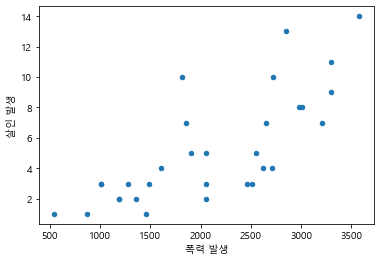

,살인 발생,폭력 발생
관서명,,
중부서,2,1355
종로서,3,1278
남대문서,1,869
서대문서,2,2056
혜화서,3,1015
용산서,5,2050
성북서,2,1194
동대문서,5,2548
마포서,8,2983


In [160]:
df.plot(kind='scatter', x='폭력 발생', y='살인 발생')
plt.show()
df[ ['살인 발생', '폭력 발생']]

          살인 발생     살인 검거     강도 발생     강도 검거     강간 발생     강간 검거     절도 발생  \
살인 발생  1.000000  0.953920  0.640281  0.486899  0.621728  0.572858  0.662590   
살인 검거  0.953920  1.000000  0.648964  0.505346  0.575409  0.571278  0.653474   
강도 발생  0.640281  0.648964  1.000000  0.866390  0.745120  0.798568  0.744599   
강도 검거  0.486899  0.505346  0.866390  1.000000  0.604698  0.744171  0.710847   
강간 발생  0.621728  0.575409  0.745120  0.604698  1.000000  0.915617  0.807301   
강간 검거  0.572858  0.571278  0.798568  0.744171  0.915617  1.000000  0.838196   
절도 발생  0.662590  0.653474  0.744599  0.710847  0.807301  0.838196  1.000000   
절도 검거  0.575135  0.587725  0.702067  0.718638  0.781462  0.831827  0.888714   
폭력 발생  0.754575  0.802798  0.793311  0.696732  0.762625  0.800653  0.897244   
폭력 검거  0.755763  0.807260  0.801213  0.699700  0.756427  0.800535  0.889385   

          절도 검거     폭력 발생     폭력 검거  
살인 발생  0.575135  0.754575  0.755763  
살인 검거  0.587725  0.802798  0.807260  
강도 발생  0.702067 

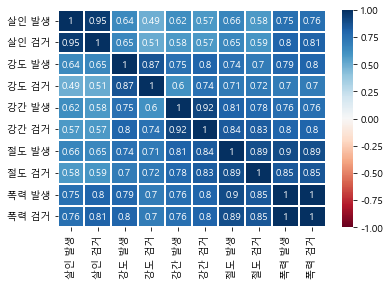

In [178]:
import seaborn as sb
#df [['살인 발생', '폭력 발생']]
print(df.corr())
print(sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='RdBu'))

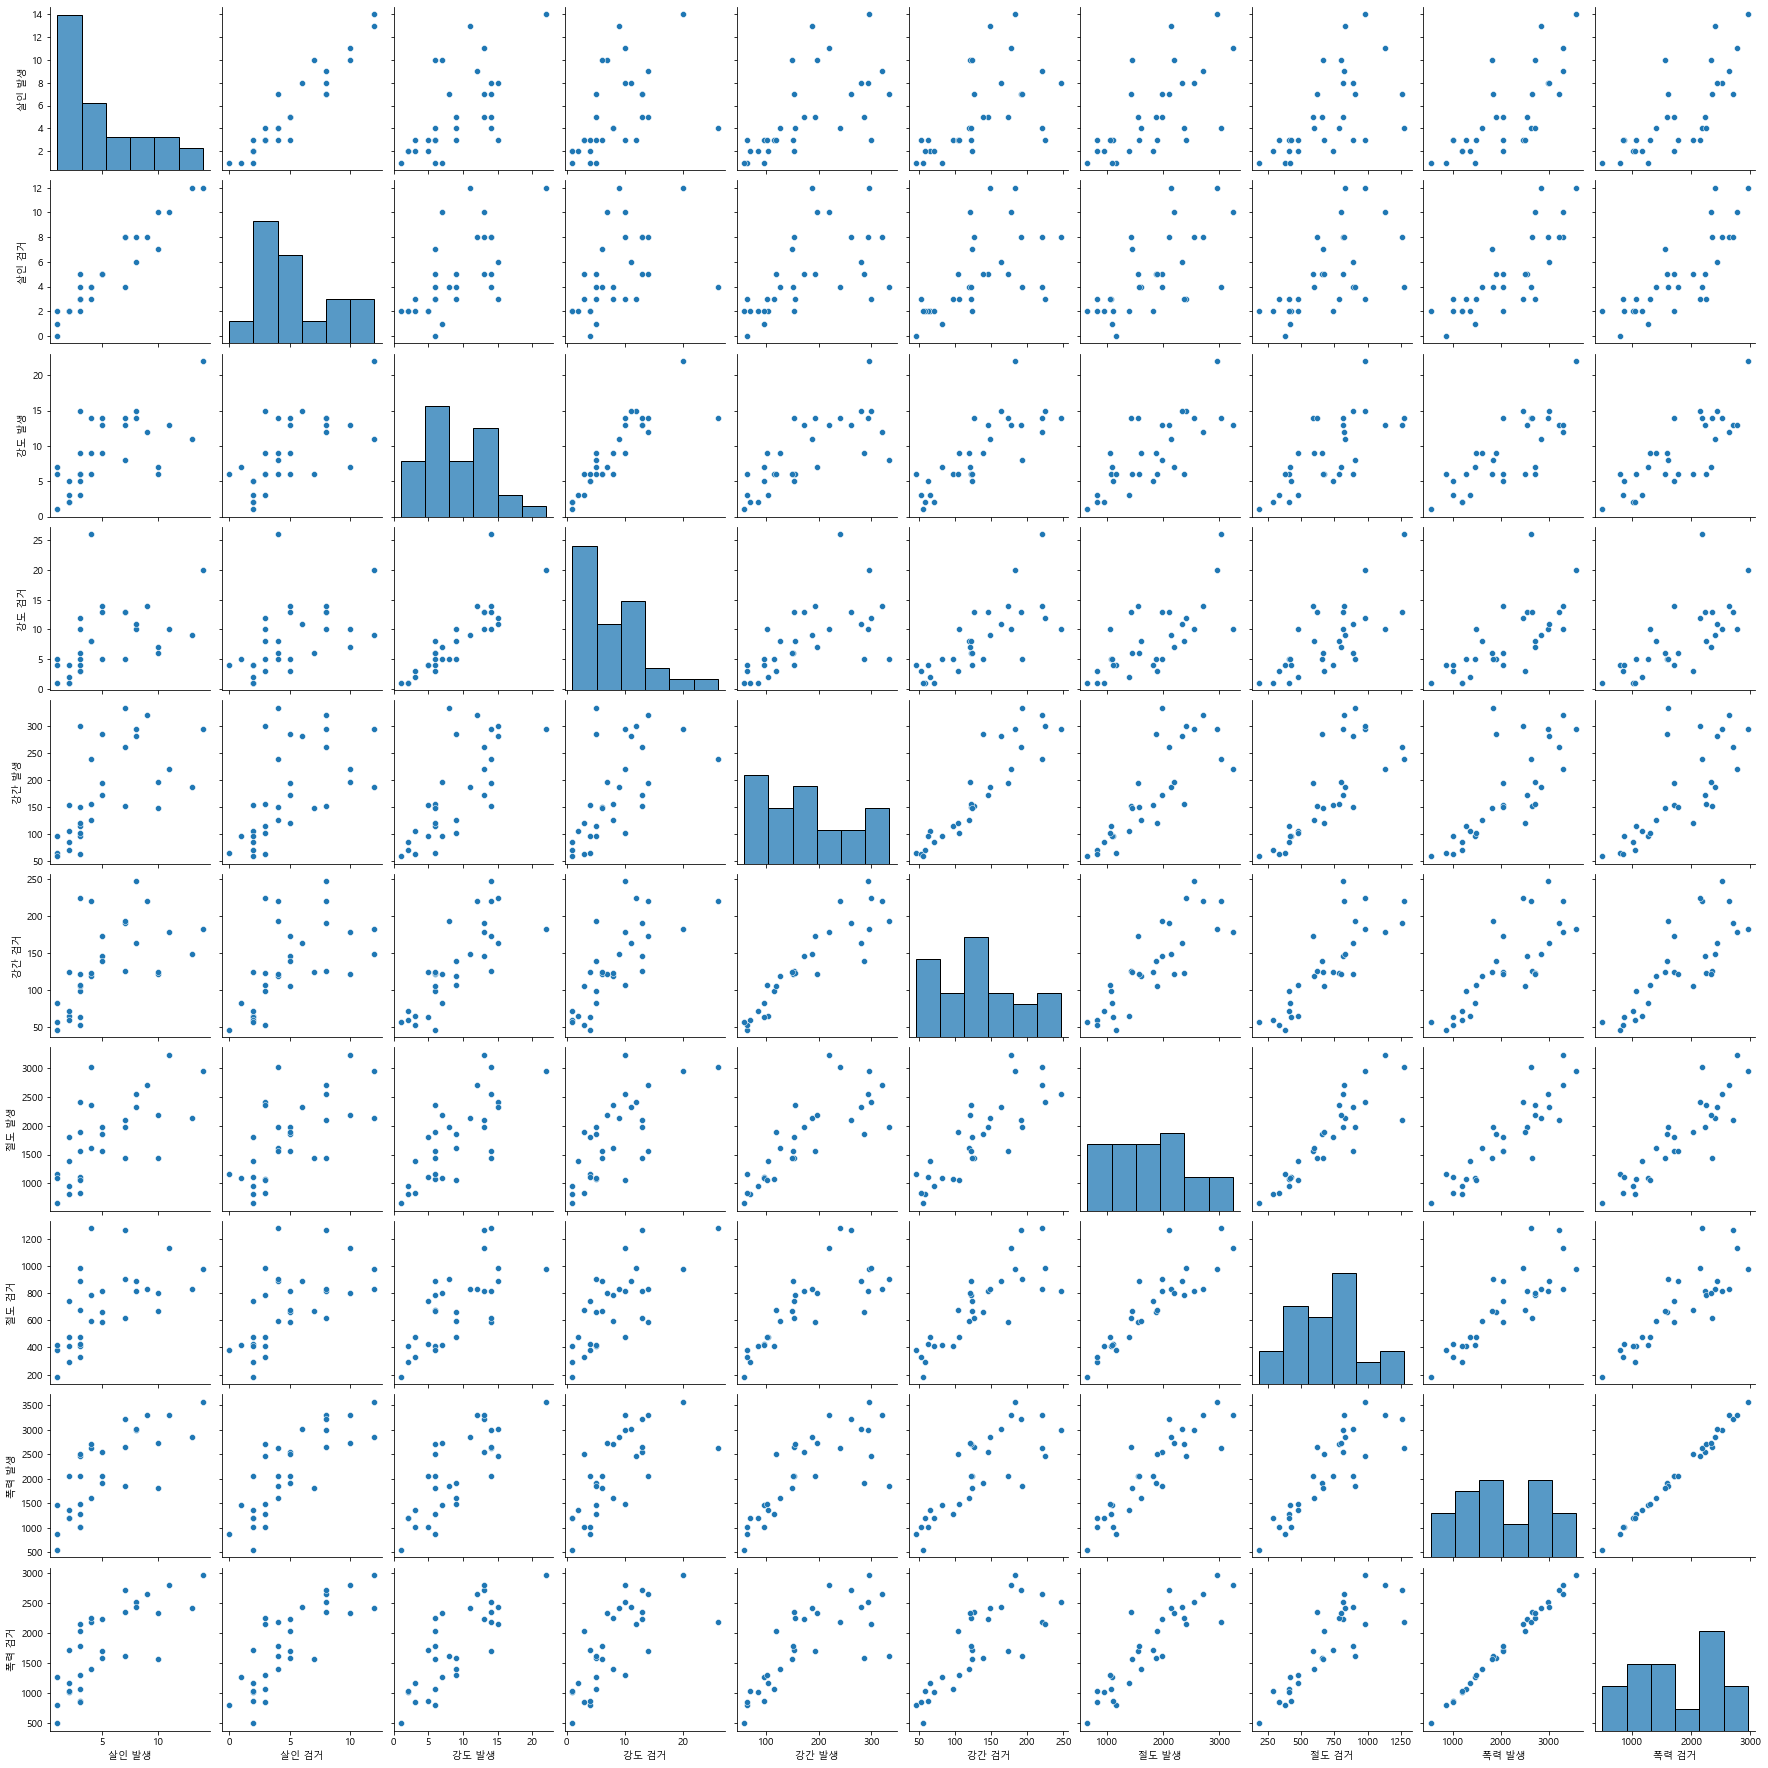

In [180]:
sb.pairplot(data = df)